## Fire/Water Pokemon Classification

Given images of *Pokemon*, let's try to predict the **type** of a given Pokemon.

We will use a tensorflow CNN to make our predictions. 

Data source: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types

### Getting Started 

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

import os
from pathlib import Path
import re

import tensorflow as tf

2024-11-12 18:25:58.053130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_dir = "images/"
train_path = Path(train_dir)

In [5]:
files = list(train_path.glob('*.png'))
files

[PosixPath('images/alakazam.png'),
 PosixPath('images/karrablast.png'),
 PosixPath('images/sandshrew.png'),
 PosixPath('images/grotle.png'),
 PosixPath('images/shinx.png'),
 PosixPath('images/mimikyu.png'),
 PosixPath('images/vespiquen.png'),
 PosixPath('images/diglett.png'),
 PosixPath('images/diancie.png'),
 PosixPath('images/slowking.png'),
 PosixPath('images/flygon.png'),
 PosixPath('images/wigglytuff.png'),
 PosixPath('images/whiscash.png'),
 PosixPath('images/crustle.png'),
 PosixPath('images/tyrogue.png'),
 PosixPath('images/nidoqueen.png'),
 PosixPath('images/totodile.png'),
 PosixPath('images/salamence.png'),
 PosixPath('images/swampert.png'),
 PosixPath('images/noibat.png'),
 PosixPath('images/solrock.png'),
 PosixPath('images/simisage.png'),
 PosixPath('images/magikarp.png'),
 PosixPath('images/shedinja.png'),
 PosixPath('images/froakie.png'),
 PosixPath('images/sewaddle.png'),
 PosixPath('images/teddiursa.png'),
 PosixPath('images/steenee.png'),
 PosixPath('images/glaceon.p

In [9]:
names = [os.path.split(x)[1] for x in list(train_path.glob('*.png'))]
names

['alakazam.png',
 'karrablast.png',
 'sandshrew.png',
 'grotle.png',
 'shinx.png',
 'mimikyu.png',
 'vespiquen.png',
 'diglett.png',
 'diancie.png',
 'slowking.png',
 'flygon.png',
 'wigglytuff.png',
 'whiscash.png',
 'crustle.png',
 'tyrogue.png',
 'nidoqueen.png',
 'totodile.png',
 'salamence.png',
 'swampert.png',
 'noibat.png',
 'solrock.png',
 'simisage.png',
 'magikarp.png',
 'shedinja.png',
 'froakie.png',
 'sewaddle.png',
 'teddiursa.png',
 'steenee.png',
 'glaceon.png',
 'jynx.png',
 'blastoise.png',
 'xatu.png',
 'poliwrath.png',
 'magmar.png',
 'tangela.png',
 'whirlipede.png',
 'clawitzer.png',
 'numel.png',
 'sandile.png',
 'electrode.png',
 'tropius.png',
 'farfetchd.png',
 'servine.png',
 'pansage.png',
 'raikou.png',
 'camerupt.png',
 'crabrawler.png',
 'hydreigon.png',
 'brionne.png',
 'wartortle.png',
 'ferrothorn.png',
 'reuniclus.png',
 'meowth.png',
 'bibarel.png',
 'kingdra.png',
 'joltik.png',
 'cresselia.png',
 'chatot.png',
 'sableye.png',
 'lopunny.png',
 'unf

In [7]:
label_df = pd.read_csv('pokemon.csv')
label_df

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard
...,...,...,...,...
804,stakataka,Rock,Steel,NaN
805,blacephalon,Fire,Ghost,NaN
806,zeraora,Electric,NaN,NaN
807,meltan,Steel,NaN,NaN


In [18]:
image_df = pd.concat([pd.Series(names, name='Name'), pd.Series(files, name='Filepath').astype(str)], axis=1)
image_df['Name'] = image_df['Name'].apply(lambda x: re.sub(r'\.\w+$', '', x))     # regex101.com
image_df

,Name,Filepath
0,alakazam,images/alakazam.png
1,karrablast,images/karrablast.png
2,sandshrew,images/sandshrew.png
3,grotle,images/grotle.png
4,shinx,images/shinx.png
...,...,...
804,floette,images/floette.png
805,gligar,images/gligar.png
806,corsola,images/corsola.png
807,lunatone,images/lunatone.png


In [19]:
# Merging dfs
train_df = image_df.merge(label_df, on='Name')
train_df = train_df.drop(['Name', 'Type2', 'Evolution'], axis=1)
train_df

,Filepath,Type1
0,images/alakazam.png,Psychic
1,images/karrablast.png,Bug
2,images/sandshrew.png,Ground
3,images/grotle.png,Grass
4,images/shinx.png,Electric
...,...,...
804,images/floette.png,Fairy
805,images/gligar.png,Ground
806,images/corsola.png,Water
807,images/lunatone.png,Rock


In [20]:
# Limiting data to Fire and Water types
train_df = train_df.query("Type1 == 'Fire' | Type1 == 'Water'")
train_df

,Filepath,Type1
9,images/slowking.png,Water
12,images/whiscash.png,Water
16,images/totodile.png,Water
18,images/swampert.png,Water
22,images/magikarp.png,Water
...,...,...
796,images/frillish.png,Water
797,images/politoed.png,Water
800,images/corphish.png,Water
806,images/corsola.png,Water


### Load Image Data

In [21]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

In [22]:
train_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Type1',
    target_size=(120, 120),
    color_mode = 'rgba',
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    seed=1,
    subset='training'
)

val_data = train_gen.flow_from_dataframe(
    train_df,
    x_col='Filepath',
    y_col='Type1',
    target_size=(120, 120),
    color_mode = 'rgba',
    class_mode='sparse',
    batch_size=32,
    shuffle=True,
    seed=1,
    subset='validation'
)

Found 134 validated image filenames belonging to 2 classes.
Found 33 validated image filenames belonging to 2 classes.


In [26]:
image_sample = train_data.next()[0]

In [27]:
image_sample[0].shape

(120, 120, 4)

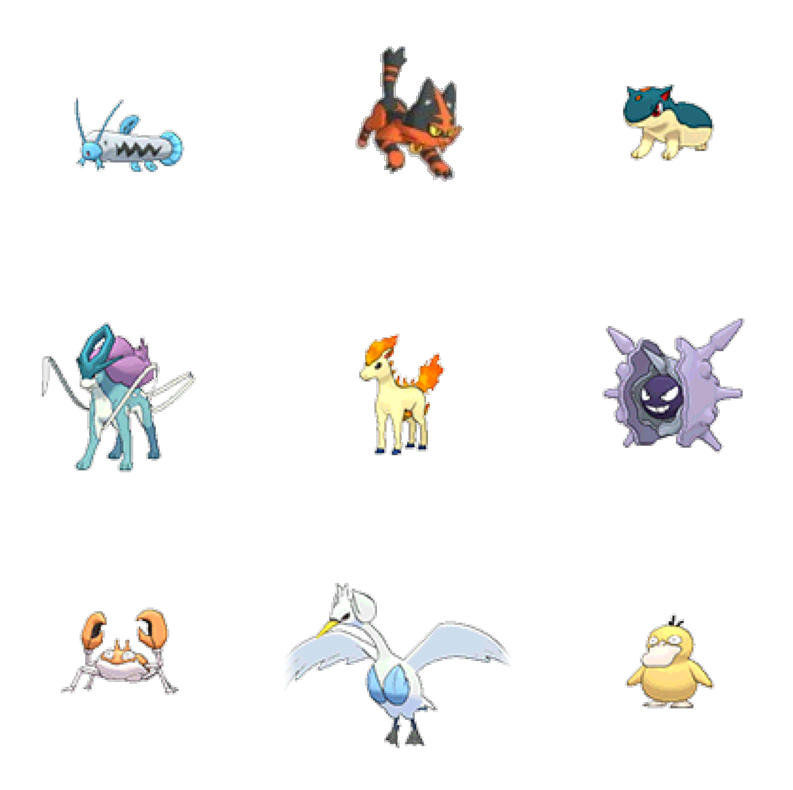

In [28]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(image_sample[i, :, :, :])
    plt.axis('off')
plt.show()

### Feature Extraction

In [30]:
inputs = tf.keras.Input(shape=(120, 120, 4))

conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(8, 8), activation='relu')(inputs)
pool1 = tf.keras.layers.MaxPool2D()(conv1)

conv2 = tf.keras.layers.Conv2D(filters=128, kernel_size=(8, 8), activation='relu')(pool1)
pool2 = tf.keras.layers.MaxPool2D()(conv2)

conv3 = tf.keras.layers.Conv2D(filters=256, kernel_size=(8, 8), activation='relu')(pool2)
pool3 = tf.keras.layers.MaxPool2D()(conv3)

outputs = tf.keras.layers.GlobalAveragePooling2D()(pool3)

feature_extractor = tf.keras.Model(inputs=inputs, outputs=outputs)

2024-11-12 19:33:39.993603: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [31]:
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 113, 113, 64)      16448     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 128)       524416    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 256)       209740

### Classification

In [32]:
clf_inputs = feature_extractor.input
clf_outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(feature_extractor.output)

classifier = tf.keras.Model(inputs=clf_inputs, outputs = clf_outputs)

In [33]:
classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 113, 113, 64)      16448     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 128)       524416    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 256)       2097

### Training

In [35]:
classifier.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

history = classifier.fit(
    train_data, 
    validation_data = val_data,
    batch_size = 32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100


2024-11-12 19:43:20.933331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - ETA: 0s - loss: 1.8220 - accuracy: 0.7015

2024-11-12 19:43:51.992507: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 34s 6s/step - loss: 1.8220 - accuracy: 0.7015 - val_loss: 0.6930 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 2/100
5/5 [==============================] - 30s 6s/step - loss: 0.6924 - accuracy: 0.7015 - val_loss: 0.6926 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 3/100
5/5 [==============================] - 28s 5s/step - loss: 0.6909 - accuracy: 0.7015 - val_loss: 0.6915 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 4/100
5/5 [==============================] - 28s 5s/step - loss: 0.6885 - accuracy: 0.7015 - val_loss: 0.6895 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 5/100
5/5 [==============================] - 27s 5s/step - loss: 0.6846 - accuracy: 0.7015 - val_loss: 0.6856 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 6/100
5/5 [==============================] - 27s 5s/step - loss: 0.6752 - accuracy: 0.7015 - val_loss: 0.6695 - val_accuracy: 0.6061 - lr: 0.0010
Epoch 7/100
5/5 [==============================] - 28s 5s/step - loss: 0.6084 - accuracy: 0.7015 - v

### Visualizing Extracted Features

In [36]:
feature_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 4)]     0         
                                                                 
 conv2d (Conv2D)             (None, 113, 113, 64)      16448     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 128)       524416    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 256)       209740

In [37]:
feature_extractor.layers

In [39]:
feature_extractor.layers[1].weights[0].shape

TensorShape([8, 8, 4, 64])

In [40]:
feature_extractor.layers[1].weights[0][:, :, :, 0]

<tf.Tensor: shape=(8, 8, 4), dtype=float32, numpy=
array([[[-3.89056988e-02,  8.19674227e-03,  7.52495369e-03,
          3.21295448e-02],
        [-2.17325799e-02,  1.73891261e-02, -2.28877161e-02,
          2.12416090e-02],
        [-3.38830166e-02, -1.74621586e-02, -6.23451034e-03,
          1.81894451e-02],
        [-4.14676890e-02,  6.29362231e-03, -2.82225683e-02,
         -1.96019653e-03],
        [-3.06556914e-02, -1.00145973e-02, -4.69741179e-04,
          2.20523570e-02],
        [-2.27341596e-02, -5.03951311e-03, -3.35945711e-02,
          1.25133712e-02],
        [ 2.10996009e-02, -3.15573104e-02, -6.48138253e-03,
         -1.55721568e-02],
        [ 1.79843456e-02, -3.03666200e-02,  8.98552407e-03,
         -4.12412994e-02]],

       [[ 6.54154597e-03, -2.19763163e-02, -2.16100104e-02,
         -2.21784622e-03],
        [-4.50868206e-03, -3.75444256e-02, -3.04061677e-02,
          2.72204839e-02],
        [ 3.58305499e-03,  1.12592978e-02, -3.26944306e-03,
         -3.54026

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000001].
Clipping input data to the valid r

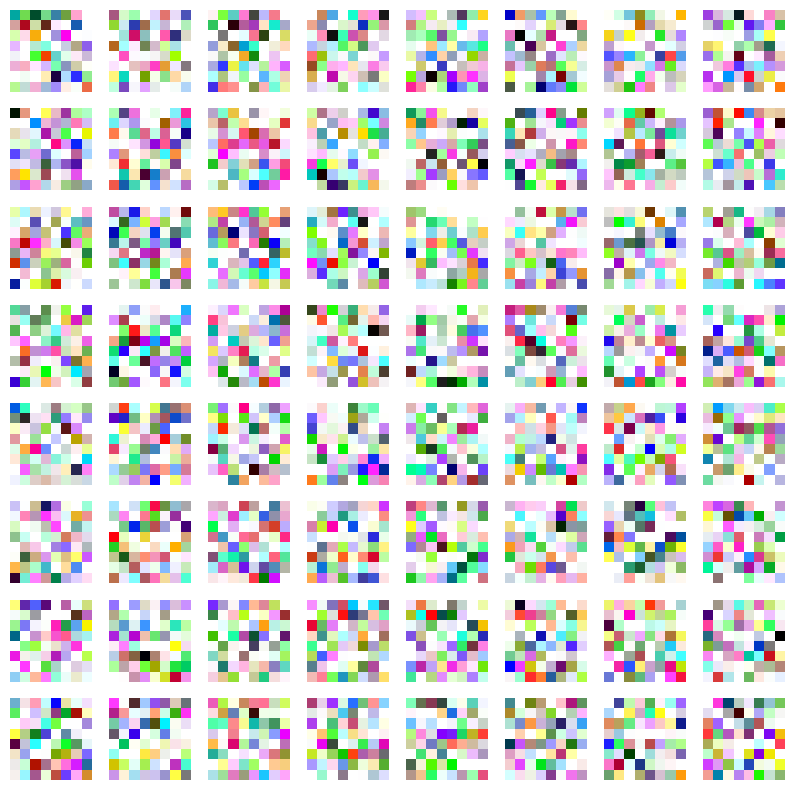

In [43]:
plt.figure(figsize=(10, 10))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    img = feature_extractor.layers[1].weights[0][:, :, :, i].numpy().copy()
    for channel in range(4):
        img[:, :, channel] = minmax_scale(img[:, :, channel])
    plt.imshow(img)
    plt.axis('off')
plt.show()